# <font color="blue"> Classification and Regression Using NN in Tensorflow</font>

Adam Hereth

This assignment will help with:
- better understand classification and regression using Neural Networks.

- practice implementing NNs in Tensorflow and Keras.

## Classification Using NN in Tensorflow

You're going to build a binary classifier NN to predict disease, i.e. "diagnosis".

The first thing to do is downloading [the breast cancer dataset](https://github.com/fereydoonvafaei/CMSC471-Spring2020/blob/master/Assignment-5/breast_cancer.csv) and save it in the same working directory as your notebook.

Read the feature specifications in [Kaggle page](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/data) to learn more about the data.

In [ ]:
# Import necessary modules from python, tensorflow and keras
# NOTE: As you work through the notebook, keep adding any required module here if necessary
...
import pandas as pd
import numpy as np
import os

import pandas
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [ ]:
print("tf Version: ", tf.__version__)
print("Eager Execution mode: ", tf.executing_eagerly())

tf Version:  2.2.0
Eager Execution mode:  True


> Next, load the data with pandas. The data (csv file) should be stored in the same working directory as your notebook.

In [ ]:
# Load dataset using pd
...
url = 'https://raw.githubusercontent.com/fereydoonvafaei/CMSC471-Spring2020/master/Assignment-5/breast_cancer.csv'
df1 = pd.read_csv(url)
data = df1
# Show the first five rows
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Preprocessing

> Check if there is any null or na in the data.

In [ ]:
print(data.isnull().sum())
data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

> Also, the first column `id` doesn't seem to provide any useful info to ML model, so drop it.

In [ ]:
len(data['id'].unique())

569

In [ ]:
# drop "id"
...
data.drop('id', axis=1, inplace=True)
print(data)

    diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0           M        17.99  ...          0.4601                  0.11890
1           M        20.57  ...          0.2750                  0.08902
2           M        19.69  ...          0.3613                  0.08758
3           M        11.42  ...          0.6638                  0.17300
4           M        20.29  ...          0.2364                  0.07678
..        ...          ...  ...             ...                      ...
564         M        21.56  ...          0.2060                  0.07115
565         M        20.13  ...          0.2572                  0.06637
566         M        16.60  ...          0.2218                  0.07820
567         M        20.60  ...          0.4087                  0.12400
568         B         7.76  ...          0.2871                  0.07039

[569 rows x 31 columns]


> Now, you can extract features and labels from `data`. Your classifier should attempt to predict `diagnosis` so that is your target/label column.

In [ ]:
# Organize data to feature vector X and label vector y
X = data.drop(columns = ['diagnosis'])
y = data['diagnosis']

In [ ]:
print("Features shape: ", X.shape)
print("Labels shape: ", y.shape)

Features shape:  (569, 30)
Labels shape:  (569,)


> Your `X` dataframe now only contains features, hence has 30 columns whereas `y` has now become a 1D vector containing labels only. Notice that `y` has 569 labels equal to the number of data records in the feature vector.

In [ ]:
# X should no longer contain the diagnosis which is target/label column - i.e. the column to be predicted
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# y should only contain diagnosis - target/label column
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [ ]:
y.unique()

array(['M', 'B'], dtype=object)

> The two classes (aka labels) here are `M` and `B` representing `malignant` and `benign` which refers to the tumors you are going to classify. You need to represent them by `1` and `0` respectively. In other words, to use sklearn classifiers and score metrics, you need to convert the categorical lables.

In [ ]:
# Encoding categorical labels M and B to 1 and 0
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

> When you have multiple features with different scales/ranges, you should consider standardizing them. There are different ways to standardize and to normalize the feature vector. One convenient way is using scikit-learn modules.

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
# Split the data to training set and testing set
...
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)
# Check the shapes of X_train, X_test, y_train, y_test
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (398, 30)
y_train shape:  (398,)
X_test shape:  (171, 30)
y_test shape:  (171,)


### Building NN for Binary Classification

> Now, you should build a binary classifier NN that can predict diagnosis.

> You can begin with a simple neural network with a couple of hidden layers, and increase number of hidden layers and neurons as needed. You may also use callback and early stopping to find the optimal number of epochs, but it's possible to obtain the minimum required accuracy (0.97) within 20 epochs only.

> **Hint-1**: During training, despite some variations, you should see a clear trend of descending loss and increasing accuracy; otherwise, your model has not been developed properly.

> **Hint-2**: Every time you want to train your network, you should start running the following cell to start with a fresh NN and to clear the previously trained weights. Otherwise, your results are not accurate.

In [ ]:
# Build a sequential NN with appropriate layers for binary classification of diagnosis
# Use ReLU for all hidden layers

layer_0 = tf.keras.layers.Dense(units=1, input_shape=[30], activation='relu')
nn_clf = tf.keras.Sequential([
    # Add layers accordingly
    layer_0
    ])


In [ ]:
nn_clf.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> Next, you should compile your `nn_clf`.

In [ ]:
# Compile nn_clf with loss='binary_crossentropy' and metrics=['accuracy']
...
nn_clf.compile(optimizer=keras.optimizers.Adadelta(learning_rate=140), loss='binary_crossentropy', metrics=['accuracy'])

> Train the model using `fit()` method.

In [ ]:
# Train nn_clf on X_train and y_train with 20 epochs
nn_clf_history = nn_clf.fit(X_train, y_train, epochs=20)

Epoch 1/20
13/13 [==============================] - 0s 1ms/step - loss: 1.7506 - accuracy: 0.8467
Epoch 2/20
13/13 [==============================] - 0s 1ms/step - loss: 0.4619 - accuracy: 0.9472
Epoch 3/20
13/13 [==============================] - 0s 1ms/step - loss: 0.3021 - accuracy: 0.9598
Epoch 4/20
13/13 [==============================] - 0s 1ms/step - loss: 0.2124 - accuracy: 0.9774
Epoch 5/20
13/13 [==============================] - 0s 1ms/step - loss: 0.2482 - accuracy: 0.9724
Epoch 6/20
13/13 [==============================] - 0s 1ms/step - loss: 0.2101 - accuracy: 0.9799
Epoch 7/20
13/13 [==============================] - 0s 1ms/step - loss: 1.3110 - accuracy: 0.8995
Epoch 8/20
13/13 [==============================] - 0s 1ms/step - loss: 0.2425 - accuracy: 0.9774
Epoch 9/20
13/13 [==============================] - 0s 1ms/step - loss: 0.2043 - accuracy: 0.9824
Epoch 10/20
13/13 [==============================] - 0s 1ms/step - loss: 0.4026 - accuracy: 0.9698
Epoch 11/20
13/13 [

> Next, plot the history of train.

(0.0, 1.0)

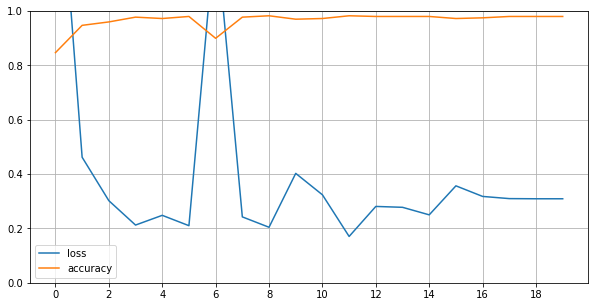

In [ ]:
pd.DataFrame(nn_clf_history.history).plot(figsize=(10, 5))
plt.grid(True)

# Set the xticks - label locations
plt.xticks(np.arange(0, 20, step=2))  

# set the y-axis range to [0-1]
plt.gca().set_ylim(0, 1) 

> To evaluate the model, you use `evaluate()` method.

> <font color='red'>**Minimum Accuracy Requirement**</font>: Your accuracy on `X_test` and `y_test` must be at least **0.97**. Otherwise, your notebook will get NO CREDIT for this part, so you must fine-tune your `nn_clf` accordingly.

In [ ]:
# Evaluate the model on X_test and y_test
loss, accuracy = nn_clf.evaluate(X_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.2820 - accuracy: 0.9708


In [ ]:
# Minimum Required Accuracy: 0.97
round(accuracy, 2)

0.97